# CIFAR-10 Dataset 분류
- 32x32픽셀의 60000개 컬러이미지 
- 10개의 클래스로 라벨링이 되어있습니다.
- MNIST와 같이 머신러닝 연구에 가장 널리 사용되는 dataset
- Train:50000 Test:10000
- Canadian Institute For Advanced Research 에서 제작

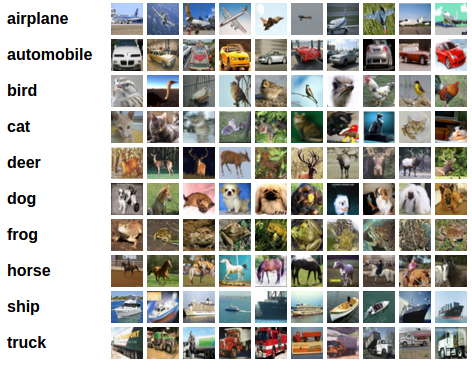

In [2]:
from tensorflow import keras
from tensorflow.keras import datasets, models, layers, utils
import numpy as np
import matplotlib.pyplot as plt

## Data 준비

In [3]:
(x_train, y_train), (x_test, y_test) \
            = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [4]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [ ]:
print(y_train[0:20])

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]
 [4]
 [7]
 [7]
 [2]
 [9]
 [9]
 [9]
 [3]
 [2]
 [6]]


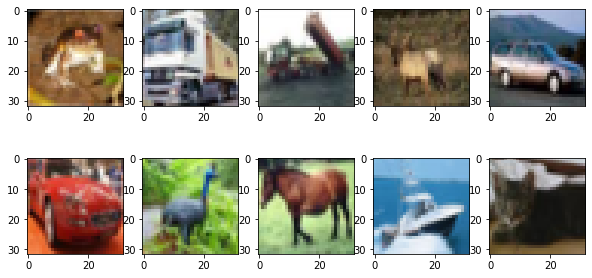

In [5]:
fig, axs = plt.subplots(2, 5, figsize=(10, 5))
for i in range(2):
  for j in range(5):
    axs[i, j].imshow(x_train[i*5+j])
plt.show()

In [6]:
classes = ('airplane','automobile','bird',
           'cat','deer','dog','frog', 'horse', 'ship','truck')

In [7]:
for y in y_train[0:10]:
  print(classes[y[0]])

frog
truck
truck
deer
automobile
automobile
bird
horse
ship
cat


In [8]:
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))


### 정규화

In [9]:
x_train, x_test = x_train/255, x_test/255

## Model 생성

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), padding='same', 
                        activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2), strides=2))
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2,2), strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 128)               5

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                metrics='accuracy')

## 학습

In [12]:
checkpoint = keras.callbacks.ModelCheckpoint("best-model.h5")
early_stopping = keras.callbacks.EarlyStopping(patience=2, 
                                               restore_best_weights=True)
history=model.fit(x_train, y_train, epochs=20, 
          validation_split=0.2, callbacks=[checkpoint, early_stopping])                                               

Epoch 1/20
1250/1250 [==============================] - 15s 4ms/step - loss: 1.6581 - accuracy: 0.3890 - val_loss: 1.3498 - val_accuracy: 0.5126
Epoch 2/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.3052 - accuracy: 0.5362 - val_loss: 1.1313 - val_accuracy: 0.5997
Epoch 3/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.1577 - accuracy: 0.5922 - val_loss: 1.0142 - val_accuracy: 0.6467
Epoch 4/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0614 - accuracy: 0.6311 - val_loss: 0.9911 - val_accuracy: 0.6602
Epoch 5/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9900 - accuracy: 0.6539 - val_loss: 0.9515 - val_accuracy: 0.6671
Epoch 6/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9238 - accuracy: 0.6766 - val_loss: 0.9524 - val_accuracy: 0.6745
Epoch 7/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.8807 - accuracy: 0.6935 - val_loss: 0.9351 - val_accuracy

In [13]:
def plot_history(history):
  plt.figure(figsize=(10, 3))
  plt.subplot(1,2,1)
  plt.plot(history['accuracy'])
  plt.plot(history['val_accuracy'])
  plt.legend(['train', 'val'])

  plt.subplot(1,2,2)
  plt.plot(history['loss'])
  plt.plot(history['val_loss'])
  plt.legend(['train', 'val'])
  plt.show()

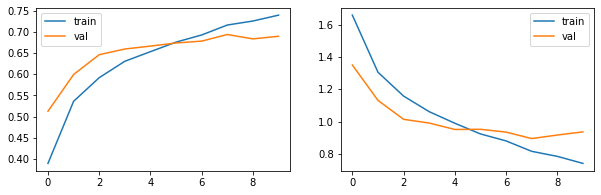

In [15]:
plot_history(history.history)

## Model 평가

In [16]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9042 - accuracy: 0.6894


[0.9041681885719299, 0.6894000172615051]

## 예측

In [17]:
pred = model.predict(x_test[0:10])
print(np.round(pred, 2))

[[0.01 0.   0.03 0.56 0.   0.37 0.01 0.   0.02 0.  ]
 [0.01 0.05 0.   0.   0.   0.   0.   0.   0.94 0.  ]
 [0.32 0.03 0.01 0.   0.   0.   0.   0.   0.61 0.02]
 [0.53 0.04 0.01 0.   0.   0.   0.   0.   0.41 0.01]
 [0.   0.   0.08 0.05 0.33 0.01 0.53 0.   0.   0.  ]
 [0.   0.   0.02 0.1  0.01 0.03 0.84 0.   0.   0.  ]
 [0.11 0.47 0.03 0.27 0.01 0.07 0.01 0.   0.03 0.01]
 [0.05 0.   0.35 0.24 0.12 0.06 0.12 0.01 0.05 0.  ]
 [0.   0.   0.02 0.72 0.07 0.18 0.01 0.02 0.   0.  ]
 [0.01 0.81 0.   0.   0.   0.   0.   0.   0.03 0.15]]


In [18]:
pred = np.argmax(pred, axis=1)
print(pred)

[3 8 8 0 6 6 1 2 3 1]


In [19]:
print(y_test[0:10].reshape(10,))

[3 8 8 0 6 6 1 6 3 1]


In [20]:
for i in pred:
  print(classes[i], end=',\t')
print()
for i in y_test[0:10].reshape(10,):
  print(classes[i], end=',\t')  

cat,	ship,	ship,	airplane,	frog,	frog,	automobile,	bird,	cat,	automobile,	
cat,	ship,	ship,	airplane,	frog,	frog,	automobile,	frog,	cat,	automobile,	

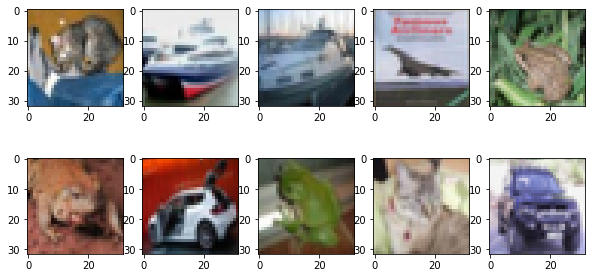

In [21]:
fig, axs = plt.subplots(2, 5, figsize=(10, 5))
for i in range(2):
  for j in range(5):
    axs[i, j].imshow(x_test[i*5+j])
plt.show()